#### TASK:
Find the sequence of medians for a given input array, using two heaps:
* Hlow(yellow) - max heap: smaller elements of array
* Hhigh(blue) - min heap: bigger elements of array

Example:
(5,6) - medians
<div>
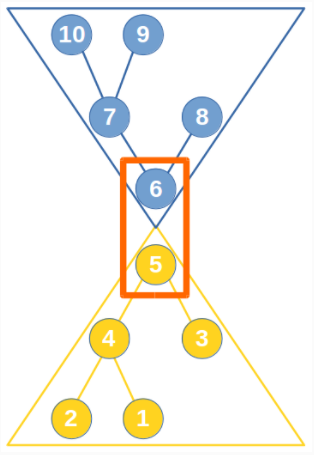
</div>

In [13]:
import math

In [14]:
def max_heapify(A, x=0):
    l = left(A, x)
    r = right(A, x)
    if r == l == None:
        return A
    if l != None:
        if l <= len(A) and A[l] > A[x]:
            largest = l
        else: 
            largest = x
    if r != None:
        if r <= len(A) and A[r] > A[largest]:
            largest = r
    if largest != x:
        A[x], A[largest] = A[largest], A[x]
        max_heapify(A, largest)
    return A


def min_heapify(A, x=0):
    l = left(A, x)
    r = right(A, x)
    if r == l == None:
        return A
    if l != None:
        if l <= len(A) and A[l] < A[x]:
            smallest = l
        else: 
            smallest = x
    if r != None:
        if r <= len(A) and A[r] < A[smallest]:
            smallest = r
    if smallest != x:
        A[x], A[smallest] = A[smallest], A[x]
        min_heapify(A, smallest)
    return A

In [15]:
def read_array(filename): #read from file into matrix
    with open(f'{filename}.txt', 'r') as f:
        l = [int(line[:-1]) for line in f]
    return l

def parent(A, x):
    if x==0:
        return None
    else: 
        ind = int((x-1)/2)
        return ind

def left(A, x):
    ind = 2*x+1
    if ind >= len(A):
        return None
    else:
        return ind

def right(A, x):
    ind = 2*x + 2
    if ind >= len(A):
        return None
    else:
        return ind
    
def print_heap(A):
    j = 0
    H = math.ceil(math.log(len(A)+1,2))
    for i in range(H):
        fin = j*2 +1
        if fin < len(A):
            print(A[j:fin])
            j = fin
        else: 
            print(A[j:])
    
def heap_maximum(A): #A-min heap
    return A[0]

def heap_minimum(A): #A-max heap
    return A[0]


def heap_increase_key_max(A):
    i = len(A) - 1
    while i > 0 and A[parent(A, i)] < A[i]:
        A[i], A[parent(A, i)] = A[parent(A, i)], A[i]
        i = parent(A, i)
    return A

def heap_increase_key_min(A):
    i = len(A) - 1
    while i > 0 and A[parent(A, i)] > A[i]:
        A[i], A[parent(A, i)] = A[parent(A, i)], A[i]
        i = parent(A, i)
    return A

In [17]:
# Hlow - max heap: smaller elements of array
# Hhigh - min heap: bigger elements of array

def add_elelment(x, Hlow, Hhigh, l):
    if len(Hlow) == len(Hhigh) == 0:
        Hhigh.append(x)
        return Hlow, Hhigh
    elif len(Hlow) !=0:
        if x < heap_maximum(Hlow):
            Hlow.append(x)
            Hlow = heap_increase_key_max(Hlow)
        else:
            Hhigh.append(x)
            Hhigh = heap_increase_key_min(Hhigh)
    else:
        if x > heap_minimum(Hhigh):
            Hhigh.append(x)
            Hhigh = heap_increase_key_min(Hhigh)
        else: 
            Hlow.append(x)
            Hlow = heap_increase_key_max(Hlow)
    return Hlow, Hhigh

def fix_length(Hlow, Hhigh):
    if len(Hlow) - len(Hhigh) == 2:
        x = heap_maximum(Hlow)
        Hlow[0] = Hlow[-1]
        Hlow = Hlow[:-1]
        Hhigh.append(x)
        Hhigh = heap_increase_key_min(Hhigh)
        Hlow = max_heapify(Hlow, 0)
    if len(Hlow) - len(Hhigh) == -2:
        x = heap_minimum(Hhigh)
        Hhigh[0] = Hhigh[-1]
        Hhigh = Hhigh[:-1]
        Hlow.append(x)
        Hlow = heap_increase_key_max(Hlow)
        Hhigh = min_heapify(Hhigh, 0)
    return Hlow, Hhigh

def arr_to_heaps(arr, l):
    Hlow = []
    Hhigh = []
    for item in arr:
        Hlow, Hhigh = add_elelment(item, Hlow, Hhigh, l)
        Hlow, Hhigh = fix_length(Hlow, Hhigh)
        med = get_medians(Hlow, Hhigh)
    return Hlow, Hhigh, med

def get_medians(Hlow, Hhigh):
    if (len(Hlow) + len(Hhigh))%2 == 0:
        m1 = heap_maximum(Hlow)
        m2 = heap_minimum(Hhigh)
        return [m1, m2]
    elif len(Hlow) > len(Hhigh):
        return heap_maximum(Hlow)
    else: 
        return heap_minimum(Hhigh)


arr = read_array("task_1")
# print("arr=", arr[1:])

Hl, Hh, med  = arr_to_heaps(arr[1:], arr[0])

# print("-----ANSWER AS HEAPS-------")
# print("Hlow")
# print_heap(Hl)
# print("Hhigh")
# print_heap(Hh)
# print("-----ANSWER AS ARRAYS-------")
# print("Hlow=", Hl)
# print("Hhigh=", Hh)
print("Median=", med)

Median= [5000, 5001]
